/usr/lib64/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning:

Casting complex values to real discards the imaginary part



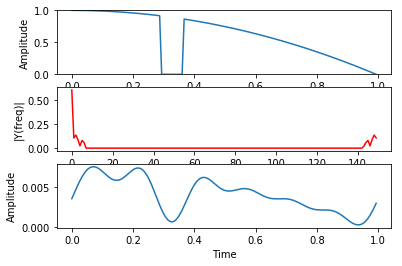

In [127]:
%matplotlib inline
import matplotlib.pyplot as plt
import plotly as py
import numpy as np
import scipy.stats
# Learn about API authentication here: https://plot.ly/python/getting-started
# Find your api_key here: https://plot.ly/settings/api

Fs = 150.0;  # sampling rate
Ts = 1.0/Fs; # sampling interval
t = np.arange(0,1,Ts) # time vector

ff = 5;   # frequency of the signal
y = scipy.stats.norm(0, 10).pdf(t)
y = (y - np.min(y)) / (np.max(y) - np.min(y))
y[44:55] = 0

n = len(y) # length of the signal
k = np.arange(n)
T = n/Fs
frq = k/T # two sides frequency range
# frq = frq[range(n//2)] # one side frequency range

Y = np.fft.fft(y)/n # fft computing and normalization
# Y = Y[range(n//2)]


def lowpass( Y, f ):
    k = int(len(Y)/2 * f)
    Y[ k : len(Y) - k ] = 0
#     Y *= np.hanning( len(Y) )
#     for i in range(0,len(Y)):
#         Y[i] = Y[i] * scipy.stats.norm(k, 1).pdf(i)
#     Y = (Y  - np.min(Y)) / (np.max(Y) - np.min(Y))
    return Y

def highpass( Y, f ):
    k = int(len(Y) * f)
    Y[0 : k] = 0
    Y[len(Y) - k  : ] = 0
    return Y

def bandpass( Y, f1, f2):
    Y = lowpass(Y, f1)
    Y = highpass(Y, f2)
    return Y


fig, ax = plt.subplots(3, 1)
ax[0].plot(t,y)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[0].set_ylim([0,1])

Y = lowpass( Y, 0.1)

ax[1].plot(frq,abs(Y),'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')
# ax[1].set_ylim([0,1])
new_y = np.fft.ifft(Y)
ax[2].plot(t,new_y)
ax[2].set_xlabel('Time')
ax[2].set_ylabel('Amplitude')
# ax[2].set_ylim([0,1])

In [57]:
def detect_outlier_position_by_fft(signal, threshold_freq=0.1,
                                   frequency_amplitude=.001):
    signal = signal.copy()
    fft_of_signal = np.fft.fft(signal)
    outlier = np.max(signal) if abs(np.max(signal)) > abs(np.min(signal)) else np.min(signal)
    if np.any(np.abs(fft_of_signal[threshold_freq*:]) > frequency_amplitude):
        index_of_outlier = np.where(signal == outlier)
        return index_of_outlier[0]
    else:
        return None

In [58]:
detect_outlier_position_by_fft(y)

TypeError: slice indices must be integers or None or have an __index__ method